<a href="https://colab.research.google.com/github/bootstrap666/Exercicio-aniversario-01.01/blob/main/Exerc%C3%ADcio_anivers%C3%A1rio_01_jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício
Considere uma sala de aula com N=23 alunos cujos aniversários são estatisticamente independentes. Considere também que a probabilidade de um aluno nascer em qualquer dia do ano é a mesma. Determine a probabilidade de ao menos dois alunos fazerem aniversário dia 01/01.

## Espaço amostral
Cada elemento do espaço amostral é um vetor binário 23-dimensional. Um bit zero na i-ésima posição do vetor indica que o i-ésimo aluno não faz aniversário no dia 01/01 e um bit 1 indica que o i-ésimo aluno faz aniversário no dia 01/01.

$$\mathbb{S} = \{ \gamma_0, \gamma_1, \ldots, \gamma_{2^{23}-1} \}$$
sendo que 
$$\gamma_k = \text{representação binária de $k$ com 23 bits}$$.

Por exemplo, $$\gamma_0 = 00000000000000000000000$$$$\gamma_1 = 00000000000000000000001$$$$\gamma_2 = 00000000000000000000010$$$$\gamma_{2^{23}-1} = 11111111111111111111111$$

##Espaço de eventos
Iremos utilizar um espaço de eventos mutuamente exclusivos 
$$\mathcal{X}_0,\mathcal{X}_1,\mathcal{X}_2, \ldots , \mathcal{X}_{23}$$
em que $\mathcal{X}_i$ indica o evento: "i indivíduos tem aniversário dia 01/01 e N-i indivíduos não tem aniversário dia 01/01".

- Os eventos são mutuamente exclusivos pois não é possível a ocorrência de $\mathcal{X}_i$ e $\mathcal{X}_j$ para $i \neq j$;
- O número de resultados favoráveis ao evento $\mathcal{X}_i$ é de 
$$\frac{N!}{k!(N-k)!}$$
ou seja, o número de combinações de $N$ elementos em grupos de $k$ ignorando sua ordem.

##Medida de probabilidade
Para cada resultado do espaço amostral, sejam
$$p = \frac{1}{365}$$
e 
$$q = 1 - \frac{1}{365} = \frac{364}{365}$$
as probabilidades de um aluno ter aniversário dia 01/01 e não ter aniversário dia 01/01 respectivamente, a probabilidade de ocorrência de cada resultado é 
$$Pr\{\gamma_k\} = p^{N1(k)} q^{N0(k)}$$
em que $N_1(k)$ indica o número de bits 1 na representação binária de k com 23 bits e $N_0(k)$ indica o número de bits 0 na representação binária de k com 23 bits. 

Oserva-se que todos os resultados favoráveis ao evento $\mathcal{X}_i$ tem o mesmo número de bits 1 (i) e o mesmo número de bits zero (N-i). Assim, a probabilidade de ocorrência do evento
$$Pr\{ \mathcal{X}_i \} = p^{i} q^{N-i} \frac{N!}{k!(N-k)!} $$

###Para finalmente resolver o exercício
Assim, a probabilidade de pelo menos dois alunos fazerem aniversário dia 01/01 pode ser determinada por
$$Pr\{\mathcal{X}_2 \cup \mathcal{X}_3 \cup \mathcal{X}_3 \cup \cdots \cup \mathcal{X}_{23}\} = Pr\{\mathcal{X}_2\} + Pr\{\mathcal{X}_3\} + Pr\{\mathcal{X}_3 \} + \cdots + Pr\{ \mathcal{X}_{23}\}$$

Alternativamente, observando que o evento complementar a pelo menos dois alunos fazerem aniversário é "menos de dois alunos fazem aniversário dia 01/01", pode-se encontrar essa probabilidade facilmente por

$$Pr\{\mathcal{X}_2 \cup \mathcal{X}_3 \cup \mathcal{X}_3 \cup \cdots \cup \mathcal{X}_{23}\} =  1 - Pr\{\mathcal{X}_0 \cup \mathcal{X}_1\} = 1 - Pr\{\mathcal{X}_0\} + Pr\{\mathcal{X}_1\}$$


In [ ]:
import numpy as np
from scipy import special 
from matplotlib import pyplot as plt

In [ ]:
year_days = 365
N = 23
p = 1.0/year_days
q = 1 - p

In [ ]:
def prob_anniversaries (k:int, N:int, p:float, q:float):
  return (p**k)*(q**(N-k))*special.comb(N,k)

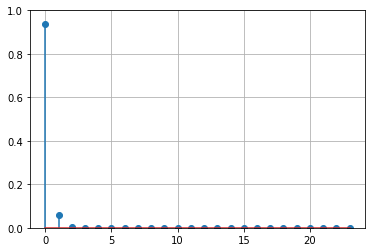

In [ ]:
pmf = []
for i in range(N+1):
  pmf.append(prob_anniversaries (i, N, p, q))
plt.stem(range(N+1),pmf, use_line_collection=True)
plt.ylim([0, 1])
plt.grid('minor')

In [ ]:
sum = 0.0
for i in range(2,N+1):
  sum += prob_anniversaries (i, N, p, q)
print (sum)

0.0018276791158928082


In [ ]:
print (1.0 - prob_anniversaries (0, N, p, q) - prob_anniversaries (1, N, p, q))

0.0018276791158925443
